# How impactful is Twitter for CTDS?

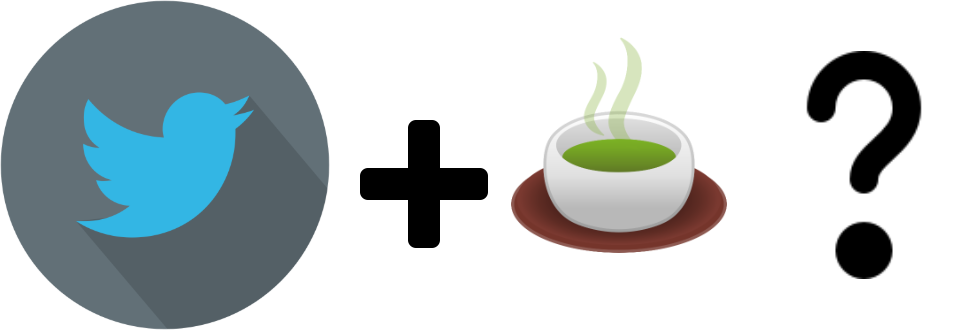


**Twitter** is how I keep up with learning. My day begins and ends with me going through twitter feeds. Closer home, I am dependent on twitter to check if Sanyam-san has any new and exciting episodes lined up for CTDS. So naturally, despite all the great data that is already a part of the competition, I decided to check how the blue bird is influencing CTDS views.  

>  ## Turns out,the chirp is a bit low! Twitter hardly seems to reflect the trend that is seen in CTDS views.  

- The number of likes and retweets (which, together, I will term as *twitter_reactions* throughout the rest of the notebook) does not seem to be consistent with the views in a CTDS episode
- The follower count of the interviewee also does not seem to influence the reach
- However, the trend was a little better with podcasts! **Joy!!**


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
tweets_sanyam = pd.read_csv("/kaggle/input/ctds-interview-tweets/sanyam_episode_tweets.csv")
tweets_sanyam["twitter_reactions"] = tweets_sanyam['fav_count'] + tweets_sanyam['retweet_count']

follower_cnt = tweets_sanyam.sort_values(by='hero_follower_count',ascending=False)

# Some meta-information

> **Information about the interviewer and the show**

Sanyam's acount creation &emsp;&emsp;&emsp;&emsp;&emsp;: October 8,2016  
CTDS's acount creation &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: June 5,2020  
Time period refered as 'In-range'&emsp;&emsp;: July 20,2019-June 20,2020  



In [ ]:
## Code to plot the meta-data ##

def get_stacked_barcharts(ax, all_data, group_name, main_series_name, title, colours):
    '''
    Fancy function to plot stacked bar charts.
    Hopefully will be useful some day!
    '''
    sns.set_style("white")
    count = 0
    legend_dict = {}

    #Plot 1 - background - top series
    ax.bar(x=all_data[group_name] , height = all_data[main_series_name], color =colours[count], width=0.4)
    legend_dict[main_series_name] = matplotlib.patches.Rectangle((0,0),1,1,fc=colours[count])

    all_data.pop(main_series_name) #Removing the main series 
    
    #Plot 2 - overlay - bottom series
    for name, value in all_data.items():
        if name == group_name:
            continue
        count += 1
        ax.bar(x=all_data[group_name], height = value, color=colours[count], width=0.4)
        legend_dict[name] = matplotlib.patches.Rectangle((0,0),1,1,fc=colours[count])


    #Legend
    l = ax.legend(list(legend_dict.values()), list(legend_dict.keys()), loc=1, ncol = 1, prop={'size':10})
    l.draw_frame(False)

    #Titles
    sns.despine(left=True)
    ax.set_xlabel("Twitter Handler")
    ax.set_ylabel("Number Of Tweets")
    ax.title.set_text(title)
    

## Helper function for bar-charts ##
def get_graph(df, color_palette=["red", "darkblue"]):
    '''
    Helper function to plot bar charts
    '''
    sns.set_style("whitegrid")
    df_melt = pd.melt(df, id_vars = "heroes")
    fig = plt.figure()
    #For this particular notebook, x is always heroes
    chart = sns.barplot(x = 'heroes', y='value', hue = 'variable',data=df_melt, ci=None, \
                        palette=color_palette)
    xlabels = chart.get_xticklabels()
    chart.set_xticklabels(['']+xlabels, rotation=90, horizontalalignment='right');
    return chart;

In [ ]:
## Metainfo in a text file. Has been copied for now. Have to automate to be read from a text file
## ---- Extracted on July 3rd ----

colours = ['aqua','powderblue','lightskyblue']
sns.set_context({"figure.figsize": (10, 10)})

tweet_metadata = {
                    'twitter_handler': ['sanyam_bhutani', 'ctds'],
                    'total_tweets': [2438, 48],
                    'inrange_tweets': [1334, 26]
                 }

inrange_metadata = {
                    'twitter_handler': ['sanyam_bhutani', 'ctds'],
                    'total_tweets': [1334, 26],
                    'interview_tweets': [283, 16],
                    'ama_tweets': [40, 2]
                   }

fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

title = "Total Tweets vs In-range tweets"
get_stacked_barcharts(ax1, deepcopy(tweet_metadata), 'twitter_handler', 'total_tweets', title, colours)
title = "Count of Normal, Interview-related, and AMA tweets within In-range tweets "
get_stacked_barcharts(ax2, deepcopy(inrange_metadata), 'twitter_handler', 'total_tweets',title, colours)
plt.show()
plt.close()

Some more info on tweets and episodes from In-range time period

Sanyam's tweets with @CTDS mentions&emsp;&emsp;&emsp;&emsp;:19  
Number of episodes with no twitter handles&emsp;&emsp;:19  
Episodes with multiple interviewees&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;:3

Tweets from CTDS handle are less since the handle was created pretty recently  
*Info as on July 3rd,2020*


> **A little information about the interviewee in the show**  

Plotting the follower count  

In [ ]:
sns.color_palette("ch:2.5,-.2,dark=.3")
plt.figure(figsize=(10,5))
chart = sns.barplot( y=follower_cnt["hero_follower_count"],
                     x=follower_cnt['heroes'],
                     palette=("Blues_d"))
xlabels = chart.get_xticklabels()
chart.set_xticklabels(['']+xlabels, rotation=90, horizontalalignment='right');
plt.show()
plt.close()

No surprises here as to who leads the awesome list!..

# Data sneek peek
Before proceeding further, taking a sneak peak into the extra columns added to episode.csv

In [ ]:
tweets_sanyam[['hero_follower_count', 'episode_hero_tweet', 'tweet_id', 'created_date', 'full_text','user_mentions', 'retweet_count', 'fav_count']].head()

No retweets have been removed. However, retweets and favourites that talk about the same interview have been merged ONLY for the analysis in this notebook.  
A master data having no pre-processing is still available for any downstream task.

# Twitter reactions and YouTube  

In the next *few* plots, let us find out how twitter reactions fare with the youtube views

- **Chirp 1**: Expecting greater number of **twitter_reactions** _(favourited + retweets)_ will corresspond to higher youtube likes. 

In [ ]:
temp_df = tweets_sanyam[["heroes","youtube_likes","twitter_reactions"]]
temp_df = temp_df.sort_values(by=["youtube_likes"], ascending=[False])


chart = get_graph(temp_df) 
plt.show()

Well! Not to be! Looks like, tweeple like heart better than thumbs up.

- **Chirp 2**: Perhaps youtube watch hours will have a better co-relation with twitter reactions than the likes then!

In [ ]:
temp_df = tweets_sanyam[["heroes","youtube_watch_hours","twitter_reactions"]]
temp_df = temp_df.sort_values(by=["youtube_watch_hours"], ascending=[False])

chart = get_graph(temp_df) 
plt.show()

Alas! Not on the expected lines! However, interesting thing to note is the slight shuffles in the x-axis. Looks like a greater number of youtube likes does not always mean longer watch hours! Of course, it also depends on the lengths of the individual videos. However, it is pretty interesting find!

- **Chirp 3**: Folks with most followers will have a better youtube reach too! Let us see if tweeple actually support my claim.

In [ ]:
temp_df = tweets_sanyam[["heroes","youtube_watch_hours","youtube_views","hero_follower_count"]]
temp_df = temp_df[temp_df.columns.difference(['heroes'])].apply(np.log, axis=1)
temp_df["heroes"] = tweets_sanyam["heroes"]

temp_df = temp_df.sort_values(by=["hero_follower_count"], ascending=[False])

palette=["darkblue","orange", "green"]

chart = get_graph(temp_df,color_palette=palette) 
plt.show()

**NO!!** Twitter let me down! Looks like the humming of the bird is not reaching you!(tube)  

*_also the visuals have been moved to log scale since data has a wider spread with large maximums and small minimums_

# Twitter reactions and Audio Podcasts  

Perhaps the *chirp* is heard, not *seen*? 

- **Chirp 1**: Checking twitter reactions with spotify streams and apple listened hours 

In [ ]:
temp_df = tweets_sanyam[["heroes","spotify_streams","apple_listened_hours","twitter_reactions"]]
temp_df = temp_df.sort_values(by=["spotify_streams","apple_listened_hours"], ascending=[False,False])

palette=["orange", "green","darkblue"]
chart = get_graph(temp_df,color_palette=palette) 
plt.show()

People seem to be streaming on spotify **and** it has a relatively closer relation to twitter reactions. Or am I forcing myself to believe it??  

- **Chirp 2**: Follower count versus the total listner count

In [ ]:
tweets_sanyam["listeners"] = np.log(tweets_sanyam['anchor_plays'] + tweets_sanyam['spotify_listeners'] + tweets_sanyam['apple_listeners'])
tweets_sanyam["heroes_follower_count"] = np.log(tweets_sanyam['hero_follower_count'])
temp_df = tweets_sanyam[["heroes","heroes_follower_count","listeners"]]
temp_df = temp_df.sort_values(by=["heroes_follower_count"], ascending=[False])

palette=["darkblue","orange"]
chart = get_graph(temp_df, color_palette=palette) 
plt.show()

More evenly spread? I get a feeling that people do listen more to the episode than they see.

*I really love the log scale, but now I doubt my interpretation.*

# And finally let the bird fly away

I got some strong beliefs about people recieving the Audio Podcast more actively. Finally, I am very much interested to compare anchor plays vs youtube views, irrespective of twitter.

In [ ]:
yt_anchors = tweets_sanyam[["heroes","anchor_plays","youtube_views"]]

yt_anchors = yt_anchors.sort_values(by=["youtube_views","anchor_plays"], ascending=[False,False])
palette=["orange", "red"]
chart = get_graph(yt_anchors,color_palette=palette) 
plt.show()

**Woohoo!** Audio Podcast version seems to be doing good!  
Personally, I am defnitely happy! Since I listen to the podcast most of the times and hardly view it.  

Perhaps should check out more comparitive trends in the data. But that will be (hopefully) for another notebook!

> **Closing Notes:**

> - This is my **first** submission **ever** on Kaggle. A liitle excited, a little anxious about its reception. Looking for constructive feedbacks!
> - I have not compared the views of episodes where there were no twitter handles mentioned, will be an interesting to check that.
> - Took an unusally long time to create the dataset *(Pandas is not co-operating with me)*, so there might be tweet likes counted on replies that will absolutely make no sense *(like Abhishek Thakur's hilarious comment about Sanyam interviewing Andreas Mueller in high spirits and not with the usual tea)*. Need to clean up the data a lot. But I am sure the conclusion will be very close.
> - Sorry for all bar-charts, if any other chart ideas, please do share. My mind bar-red me from escaping them. 
> - If there are any more suggestions on using twitter data to check for CTDS show, please reach out. Will love to give it a shot!